<a href="https://colab.research.google.com/github/MoRamadan253/Sentiment_Classification/blob/main/sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Removing Bad Images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'Data'

In [ ]:
img_ext = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in img_ext:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue')

Image not in extension list Data\Happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in extension list Data\Happy\2560px-Happy_People.jpg
Image not in extension list Data\Happy\31418025-diverse-happy-people.jpg
Image not in extension list Data\Happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in extension list Data\Happy\56f455011e0000b300705475.jpeg
Image not in extension list Data\Happy\guilherme-stecanella-375176-unsplash.jpg
Image not in extension list Data\Happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in extension list Data\Happy\sjnv_cnh7ugnaddm7so6sq.jpg
Image not in extension list Data\Happy\traitshappypeople.jpg
Image not in extension list Data\Sad\39843138-sad-man.jpg
Image not in extension list Data\Sad\50740738-sad-people-s-portraits.jpg
Image not in extension list Data\Sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in extension list Data\Sad\crying-sad.gif
Image not in extension list Data\Sad\depositphotos_86851530-

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 182 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[1]

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

# Pre-Processing

Scaling our data

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled = data.as_numpy_iterator()

In [ ]:
batch = scaled.next()

In [ ]:
batch[0].max()

1.0

Split

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

# Model

Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 901ms/step - loss: 1.1213 - accuracy: 0.5234 - val_loss: 0.7349 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 4s 837ms/step - loss: 0.6088 - accuracy: 0.6328 - val_loss: 0.5978 - val_accuracy: 0.7188
Epoch 3/20
4/4 [==============================] - 4s 816ms/step - loss: 0.5795 - accuracy: 0.6406 - val_loss: 0.6895 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 4s 811ms/step - loss: 0.5470 - accuracy: 0.7031 - val_loss: 0.5334 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 4s 820ms/step - loss: 0.4819 - accuracy: 0.8125 - val_loss: 0.4909 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 4s 812ms/step - loss: 0.4419 - accuracy: 0.7812 - val_loss: 0.4017 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 4s 858ms/step - loss: 0.3444 - accuracy: 0.8906 - val_loss: 0.2487 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

In [ ]:
hist.history

{'loss': [1.1213006973266602,
  0.6088196635246277,
  0.5794900059700012,
  0.5469763278961182,
  0.4819251298904419,
  0.441907674074173,
  0.3443678021430969,
  0.2696898877620697,
  0.28907153010368347,
  0.2131929099559784,
  0.13450074195861816,
  0.0779140517115593,
  0.08611686527729034,
  0.04615269601345062,
  0.031426895409822464,
  0.020099768415093422,
  0.01432773470878601,
  0.009242132306098938,
  0.0038960317615419626,
  0.0027349761221557856],
 'accuracy': [0.5234375,
  0.6328125,
  0.640625,
  0.703125,
  0.8125,
  0.78125,
  0.890625,
  0.8828125,
  0.890625,
  0.9296875,
  0.984375,
  0.984375,
  0.9609375,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7349088191986084,
  0.5977992415428162,
  0.6894635558128357,
  0.533380389213562,
  0.49088844656944275,
  0.4016939401626587,
  0.2487105131149292,
  0.3285136818885803,
  0.22450602054595947,
  0.16830061376094818,
  0.1199314296245575,
  0.09097357094287872,
  0.026769284158945084,
  0.04

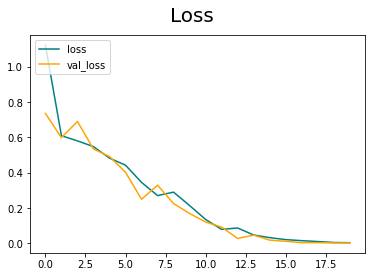

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

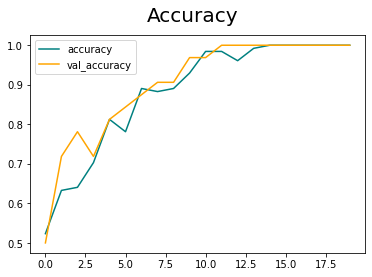

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 136ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
